In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import seaborn as sns

In [3]:
CG_table = pd.read_csv('human_meth_cleaned.csv')

In [4]:
CG_table

,Chromosome,Start,Stop,Sepsis_03423-1,Sepsis_03429-2,Sepsis_03436-3,Sepsis_03436-55,Sepsis_03443-4,Sepsis_03456-5,Sepsis_03456-56,...,Neonate1050,Neonate1051,Neonate1052,Neonate1057,Neonate1060,Neonate1069,Neonate1072,Neonate1073,Neonate1074,Neonate1075
0,13,18944359,18944479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.846154,0.847510,0.822472,0.840491,0.838174,0.811836,0.778607,0.807525,0.827899,0.815789
1,17,22375472,22375592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.784173,0.801968,0.783951,0.796763,0.773585,0.824324,0.783186,0.761996,0.875758,0.792079
2,20,64286041,64286161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.731707,0.875000,0.842105,0.400000,0.611111,0.588235,0.818182,1.000000,0.600000
3,17,619167,619287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.857143,0.863594,0.872798,0.914779,0.910377,0.882060,0.851648,0.876543,0.898077,0.906706
4,2,85674199,85674319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.815789,0.743017,0.820000,0.746032,0.777778,0.785047,0.800000,0.779661,0.839080,0.804878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6331,X,152451707,152451827,0.071429,0.032258,0.372549,0.411765,0.024390,0.138889,0.076923,...,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.535714,0.338710,0.000000,0.090909
6332,X,153669761,153669881,0.645161,0.862069,0.822222,0.903226,0.739130,0.850000,0.700000,...,1.000000,0.712500,0.625000,0.786885,NaN,0.779661,0.788462,0.754902,0.863636,0.947368
6333,X,153674642,153674762,0.839572,0.832215,0.844985,0.915751,0.862385,0.815166,0.851064,...,0.803922,0.781197,0.828996,0.857322,0.847826,0.833887,0.849558,0.839286,0.817708,0.922156
6334,X,153774712,153774832,0.881356,0.900000,0.888889,0.873239,0.759259,0.887097,0.821429,...,0.500000,0.755725,0.789474,0.814978,0.920000,0.875000,0.690476,0.787440,0.815789,0.866667


In [7]:
human_table = pd.read_csv('MetadataHuman2021_554.csv')

In [8]:
human_table

,sampleID,age,LARS predicted age,PLS predicted age,ElasticNet predicted age,Ridge predicted age,gender,predicted gender,imputed (predicted),weight(lbs),height(cm),BMI,race,smoker
0,SA03423,74.0,90.076,75.589,73.816,74.199,1.0,1.0,NaN,NaN,NaN,NaN,blck,NaN
1,SA03429,82.0,80.373,70.162,75.128,74.401,1.0,1.0,NaN,NaN,NaN,NaN,cauc,NaN
2,SA03436,46.0,46.323,56.339,58.376,59.409,0.0,0.0,NaN,NaN,NaN,NaN,cauc,NaN
3,SA03436,46.0,52.931,57.097,47.331,45.272,0.0,0.0,NaN,NaN,NaN,NaN,cauc,NaN
4,SA03443,59.0,54.410,60.557,63.130,61.196,1.0,1.0,NaN,NaN,NaN,NaN,blck,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Neonate1069,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,Neonate1072,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,Neonate1073,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
568,Neonate1074,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Clean methylation table

CG_table_drop = CG_table.drop(['Chromosome', 'Start', 'Stop'],axis=1)
CG_table_drop = CG_table_drop.dropna(axis = 'rows')
CG_table_drop = CG_table_drop.to_numpy()
CG_table_drop = np.transpose(CG_table_drop)
print(CG_table_drop)
print(CG_table_drop.shape)

[[0.18348624 0.29533679 0.67315175 ... 0.83957219 0.88135593 0.7910628 ]
 [0.13745704 0.25641026 0.73991031 ... 0.83221477 0.9        0.62204724]
 [0.07177034 0.15753425 0.71590909 ... 0.8449848  0.88888889 0.69440655]
 ...
 [0.01914079 0.04952077 0.30656934 ... 0.83928571 0.78743961 0.79720745]
 [0.02332361 0.03100775 0.37099024 ... 0.81770833 0.81578947 0.83625731]
 [0.02640643 0.04679803 0.456      ... 0.92215569 0.86666667 0.90151515]]
(570, 1650)


In [10]:
# Extract ages and genders
ages = human_table['age']
genders = human_table['gender']

In [11]:
ages = ages.to_numpy()
print(ages.shape)

(570,)


**Epigenetic Age**

In [12]:
def get_lars_age_predictions(X_train, Y_train):
    loo = LeaveOneOut()
    predicted_ages = []

    for train_index, test_index in loo.split(X_train):
        X_retrain, X_retest = X_train[train_index], X_train[test_index]
        Y_retrain, Y_retest = Y_train[train_index], Y_train[test_index]
        lars = LassoLars(alpha = 0.001)
        lars.fit(X_retrain, Y_retrain)
        predicted_ages.append(lars.predict(X_retest)[0])
    
    return predicted_ages

In [13]:
def get_median_abs_error(prediction, actual):
    errors = []
    for i in range(len(prediction)):
        difference = np.abs(prediction[i] - actual[i])
        errors.append(difference)
    return statistics.median(errors)

def get_r_value(predicted_ages_list, actual_ages_list):
    r_value = np.corrcoef(actual_ages_list, predicted_ages_list)[0,1]
    return r_value

def get_r_squared(predicted_ages_list, actual_ages_list):
    return (get_r_value(predicted_ages_list, actual_ages_list)**2)

def plot_predictions(predicted_ages_list, actual_ages_list):
    plt.plot(actual_ages_list, predicted_ages_list, 'ko')
    plt.ylabel("Predicted Age")
    plt.xlabel("Actual Age")
    plt.title("Ridge Model of Predicted Age")
#     plt.text(8, 2, "Median Absolute Error: 0.6543")
#     plt.text(8, 1, "R squared: 0.9008")
    plt.plot(actual_ages_list, actual_ages_list, 'r--')
#     plt.savefig('Predicted_vs_actual_human_ridge_554.png', dpi = 400)
    plt.show()
    print("R squared: ", get_r_squared(predicted_ages_list, actual_ages_list))
    print("R value: ", get_r_value(predicted_ages_list, actual_ages_list))
    print("Median Absolute Error: ", get_median_abs_error(predicted_ages_list, actual_ages_list))

In [14]:
methylation = CG_table_drop
lars_predict = get_lars_age_predictions(methylation, ages)

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alpha=2.215e-02, with an active set of 81 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 104 iterations, i.e. alpha=1.910e-02, with an active set of 100 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is n

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alpha=2.253e-02, with an active set of 81 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 101 iterations, i.e. alpha=1.913e-02, with an active set of 99 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 171 iterations, i.e. alpha=

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 151 iterations, i.e. alpha=1.383e-02, with an active set of 143 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 183 iterations, alpha=1.184e-02, previous alpha=1.182e-02, with an active set of 174 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alpha=2.231e-02, with a

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 144 iterations, i.e. alpha=1.437e-02, with an active set of 136 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 171 iterations, alpha=1.224e-02, previous alpha=1.223e-02, with an active set of 162 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 87 iterations, i.e. alpha=2.136e-02, with a

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 277 iterations, alpha=7.249e-03, previous alpha=7.242e-03, with an active set of 244 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 88 iterations, i.e. alpha=2.122e-02, with an active set of 86 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 160 iterations, i.e. alpha=1.288e-02, with an

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 100 iterations, i.e. alpha=1.986e-02, with an active set of 98 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 134 iterations, i.e. alpha=1.540e-02, with an active set of 128 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 289 iterations, i.e. alph

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 235 iterations, i.e. alpha=9.230e-03, with an active set of 205 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 425 iterations, i.e. alpha=4.255e-03, with an active set of 339 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 243 iterations, i.e. alpha=8.501e-03, with an active set of 215 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 251 iterations, i.e. alpha=8.184e-03, with an active set of 221 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 313 iterations, alpha=6.215e-03, previous alpha=6.195e-03, with an active set of 272 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 86 iterations, i.e. alpha=2.234e-02, with an active set of 82 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 143 iterations, i.e. alpha=1.463e-02, with an

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 88 iterations, i.e. alpha=2.155e-02, with an active set of 86 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 161 iterations, i.e. alpha=1.301e-02, with an active set of 153 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 236 iterations, i.e. alpha

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 100 iterations, i.e. alpha=2.011e-02, with an active set of 94 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 380 iterations, i.e. alpha=4.813e-03, with an active set of 320 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 90 iterations, i.e. alpha

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 206 iterations, alpha=1.069e-02, previous alpha=1.069e-02, with an active set of 191 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 84 iterations, i.e. alpha=2.213e-02, with an active set of 82 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 149 iterations, i.e. alpha=1.433e-02, with an

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alpha=2.259e-02, with an active set of 81 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 104 iterations, i.e. alpha=1.933e-02, with an active set of 102 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 167 iterations, i.e. alpha

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 152 iterations, i.e. alpha=1.388e-02, with an active set of 144 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 219 iterations, alpha=1.004e-02, previous alpha=1.002e-02, with an active set of 198 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 85 iterations, i.e. alpha=2.196e-02, with a

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 326 iterations, i.e. alpha=6.118e-03, with an active set of 278 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 327 iterations, i.e. alpha=6.071e-03, with an active set of 279 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 353 iterations, i.e. alp

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 87 iterations, i.e. alpha=2.182e-02, with an active set of 83 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 154 iterations, i.e. alpha=1.369e-02, with an active set of 146 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 358 iterations, i.e. alpha

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alpha=2.223e-02, with an active set of 81 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 104 iterations, i.e. alpha=1.911e-02, with an active set of 102 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 166 iterations, i.e. alpha

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 343 iterations, alpha=5.640e-03, previous alpha=5.637e-03, with an active set of 290 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alpha=2.241e-02, with an active set of 81 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 104 iterations, i.e. alpha=1.932e-02, with an

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 470 iterations, alpha=3.228e-03, previous alpha=3.226e-03, with an active set of 373 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 86 iterations, i.e. alpha=2.203e-02, with an active set of 84 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 251 iterations, i.e. alpha=8.078e-03, with an

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 170 iterations, i.e. alpha=1.242e-02, with an active set of 160 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 186 iterations, alpha=1.178e-02, previous alpha=1.173e-02, with an active set of 175 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 87 iterations, i.e. alpha=2.149e-02, with a

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alpha=2.238e-02, with an active set of 81 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 104 iterations, i.e. alpha=1.922e-02, with an active set of 102 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 165 iterations, i.e. alpha

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 249 iterations, alpha=7.890e-03, previous alpha=7.890e-03, with an active set of 220 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 84 iterations, i.e. alpha=2.240e-02, with an active set of 82 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 144 iterations, i.e. alpha=1.443e-02, with an

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 85 iterations, i.e. alpha=2.198e-02, with an active set of 83 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 150 iterations, i.e. alpha=1.363e-02, with an active set of 144 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is n

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 335 iterations, i.e. alpha=5.827e-03, with an active set of 285 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 345 iterations, alpha=5.676e-03, previous alpha=5.670e-03, with an active set of 294 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 100 iterations, i.e. alpha=1.951e-02, with 

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 84 iterations, i.e. alpha=2.270e-02, with an active set of 82 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 143 iterations, i.e. alpha=1.455e-02, with an active set of 135 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 208 iterations, i.e. alpha

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 374 iterations, i.e. alpha=5.178e-03, with an active set of 314 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alpha=2.244e-02, with an active set of 81 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 104 iterations, i.e. alpha

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 84 iterations, i.e. alpha=2.209e-02, with an active set of 82 regressors, and the smallest cholesky pivot element being 2.788e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 151 iterations, i.e. alpha=1.413e-02, with an active set of 141 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is n

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 223 iterations, alpha=9.612e-03, previous alpha=9.593e-03, with an active set of 204 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 91 iterations, i.e. alpha=2.112e-02, with an active set of 89 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alpha=2.224e-02, with an 

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 490 iterations, i.e. alpha=3.023e-03, with an active set of 378 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 79 iterations, i.e. alpha=2.386e-02, with an active set of 77 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 254 iterations, i.e. alpha

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 147 iterations, i.e. alpha=1.412e-02, with an active set of 139 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 182 iterations, alpha=1.196e-02, previous alpha=1.195e-02, with an active set of 171 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 93 iterations, i.e. alpha=2.098e-02, with a

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 248 iterations, i.e. alpha=7.929e-03, with an active set of 224 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 308 iterations, alpha=6.219e-03, previous alpha=6.219e-03, with an active set of 267 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 86 iterations, i.e. alpha=2.144e-02, with a

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 147 iterations, i.e. alpha=1.414e-02, with an active set of 139 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 255 iterations, alpha=8.023e-03, previous alpha=8.021e-03, with an active set of 222 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 85 iterations, i.e. alpha=2.219e-02, with a

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 146 iterations, i.e. alpha=1.422e-02, with an active set of 138 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 270 iterations, i.e. alpha=7.235e-03, with an active set of 236 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 157 iterations, i.e. alpha=1.346e-02, with an active set of 149 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 160 iterations, i.e. alpha=1.292e-02, with an active set of 152 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 84 iterations, i.e. alpha=2.215e-02, with an active set of 82 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 144 iterations, i.e. alpha=1.425e-02, with an active set of 136 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 399 iterations, i.e. alpha

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 87 iterations, i.e. alpha=2.149e-02, with an active set of 85 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 85 iterations, i.e. alpha=2.215e-02, with an active set of 83 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 151 iterations, i.e. alpha=1

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 236 iterations, alpha=8.586e-03, previous alpha=8.576e-03, with an active set of 211 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 85 iterations, i.e. alpha=2.213e-02, with an active set of 83 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 151 iterations, i.e. alpha=1.388e-02, with an

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 119 iterations, i.e. alpha=1.726e-02, with an active set of 113 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 158 iterations, i.e. alpha=1.324e-02, with an active set of 150 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 225 iterations, alpha=9.549e-03, previous alpha=9.539e-03, with an active set of 206 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 84 iterations, i.e. alpha=2.203e-02, with an active set of 82 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 148 iterations, i.e. alpha=1.409e-02, with an

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 206 iterations, alpha=1.075e-02, previous alpha=1.075e-02, with an active set of 191 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alpha=2.280e-02, with an active set of 79 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 149 iterations, i.e. alpha=1.446e-02, with an

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 84 iterations, i.e. alpha=2.239e-02, with an active set of 82 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 144 iterations, i.e. alpha=1.450e-02, with an active set of 136 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is n

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 145 iterations, i.e. alpha=1.441e-02, with an active set of 137 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 179 iterations, alpha=1.209e-02, previous alpha=1.200e-02, with an active set of 170 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 81 iterations, i.e. alpha=2.339e-02, with a

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 144 iterations, i.e. alpha=1.444e-02, with an active set of 136 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 317 iterations, alpha=6.480e-03, previous alpha=6.478e-03, with an active set of 268 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 89 iterations, i.e. alpha=2.143e-02, with a

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 260 iterations, i.e. alpha=7.335e-03, with an active set of 228 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 287 iterations, alpha=6.760e-03, previous alpha=6.760e-03, with an active set of 254 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 86 iterations, i.e. alpha=2.216e-02, with a

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 85 iterations, i.e. alpha=2.206e-02, with an active set of 83 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 151 iterations, i.e. alpha=1.383e-02, with an active set of 143 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 409 iterations, i.e. alpha

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 152 iterations, i.e. alpha=1.370e-02, with an active set of 144 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 182 iterations, alpha=1.188e-02, previous alpha=1.185e-02, with an active set of 173 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 88 iterations, i.e. alpha=2.138e-02, with a

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 88 iterations, i.e. alpha=2.175e-02, with an active set of 86 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 162 iterations, i.e. alpha=1.319e-02, with an active set of 152 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 315 iterations, i.e. alpha

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 93 iterations, i.e. alpha=2.073e-02, with an active set of 91 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alpha=2.247e-02, with an active set of 81 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 103 iterations, i.e. alpha=1

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 88 iterations, i.e. alpha=2.147e-02, with an active set of 86 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 157 iterations, i.e. alpha=1.318e-02, with an active set of 149 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 165 iterations, i.e. alpha

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 393 iterations, i.e. alpha=4.358e-03, with an active set of 331 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 448 iterations, i.e. alpha=3.568e-03, with an active set of 370 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 477 iterations, i.e. alp

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 99 iterations, i.e. alpha=1.982e-02, with an active set of 95 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 164 iterations, i.e. alpha=1.309e-02, with an active set of 154 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is n

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 85 iterations, i.e. alpha=2.219e-02, with an active set of 83 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 150 iterations, i.e. alpha=1.392e-02, with an active set of 142 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is n

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 230 iterations, i.e. alpha=9.370e-03, with an active set of 212 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 320 iterations, alpha=6.278e-03, previous alpha=6.262e-03, with an active set of 273 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alpha=2.243e-02, with a

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 84 iterations, i.e. alpha=2.211e-02, with an active set of 82 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 141 iterations, i.e. alpha=1.428e-02, with an active set of 133 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is n

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 396 iterations, i.e. alpha=4.606e-03, with an active set of 326 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 106 iterations, i.e. alpha=1.850e-02, with an active set of 104 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 252 iterations, i.e. alp

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 254 iterations, i.e. alpha=7.887e-03, with an active set of 226 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 260 iterations, alpha=7.589e-03, previous alpha=7.561e-03, with an active set of 231 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 86 iterations, i.e. alpha=2.203e-02, with a

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 224 iterations, alpha=9.624e-03, previous alpha=9.614e-03, with an active set of 201 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 87 iterations, i.e. alpha=2.168e-02, with an active set of 85 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 84 iterations, i.e. alpha=2.204e-02, with an 

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 86 iterations, i.e. alpha=2.188e-02, with an active set of 84 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 248 iterations, i.e. alpha=7.997e-03, with an active set of 220 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 497 iterations, i.e. alpha

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 84 iterations, i.e. alpha=2.200e-02, with an active set of 82 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 146 iterations, i.e. alpha=1.405e-02, with an active set of 138 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is n

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 82 iterations, i.e. alpha=2.257e-02, with an active set of 80 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 101 iterations, i.e. alpha=1.950e-02, with an active set of 99 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 160 iterations, i.e. alpha=

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 244 iterations, i.e. alpha=8.023e-03, with an active set of 218 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 475 iterations, i.e. alpha=3.112e-03, with an active set of 369 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 96 iterations, i.e. alph

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 321 iterations, i.e. alpha=6.002e-03, with an active set of 275 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 373 iterations, alpha=4.864e-03, previous alpha=4.860e-03, with an active set of 318 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 84 iterations, i.e. alpha=2.207e-02, with a

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 85 iterations, i.e. alpha=2.188e-02, with an active set of 83 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 162 iterations, i.e. alpha=1.329e-02, with an active set of 152 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is n

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 370 iterations, alpha=5.388e-03, previous alpha=5.346e-03, with an active set of 307 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 82 iterations, i.e. alpha=2.305e-02, with an active set of 80 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 101 iterations, i.e. alpha=1.980e-02, with an

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 234 iterations, i.e. alpha=8.509e-03, with an active set of 210 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 275 iterations, i.e. alpha=6.985e-03, with an active set of 245 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alph

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alpha=2.243e-02, with an active set of 81 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 104 iterations, i.e. alpha=1.927e-02, with an active set of 102 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 169 iterations, i.e. alpha

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 83 iterations, i.e. alpha=2.249e-02, with an active set of 81 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 104 iterations, i.e. alpha=1.934e-02, with an active set of 102 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is n

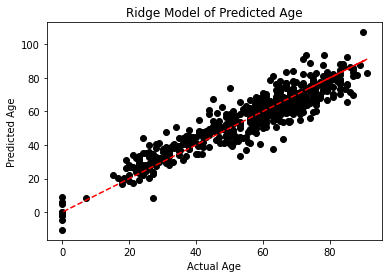

R squared:  0.8783600799535239
R value:  0.9372086640410042
Median Absolute Error:  4.516009672798127


In [16]:
plot_predictions(lars_predict, ages)

In [17]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.cross_decomposition import PLSCanonical
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

In [18]:
def get_pls_age_predictions(X_train, Y_train):
    loo = LeaveOneOut()
    predicted_ages = []

    for train_index, test_index in loo.split(X_train):
        X_retrain, X_retest = X_train[train_index], X_train[test_index]
        Y_retrain, Y_retest = Y_train[train_index], Y_train[test_index]
        pls = PLSRegression(n_components = 3)
        pls.fit(X_retrain, Y_retrain)
        predicted_ages.append(pls.predict(X_retest)[0][0])
    
    return predicted_ages

In [19]:
pls_predict = get_pls_age_predictions(methylation, ages)

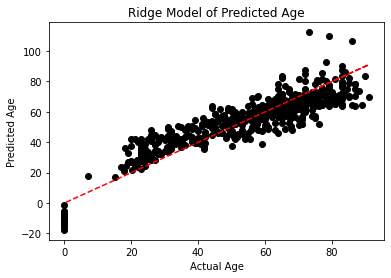

R squared:  0.7914980745677055
R value:  0.8896617753774214
Median Absolute Error:  6.053628579775641


In [20]:
plot_predictions(pls_predict, ages)

In [21]:
def get_elastic_age_predictions(X_train, Y_train):
    loo = LeaveOneOut()
    predicted_ages = []

    for train_index, test_index in loo.split(X_train):
        X_retrain, X_retest = X_train[train_index], X_train[test_index]
        Y_retrain, Y_retest = Y_train[train_index], Y_train[test_index]
        elastic = ElasticNet(alpha = 0.001, l1_ratio = 0.5)
        elastic.fit(X_retrain, Y_retrain)
        predicted_ages.append(elastic.predict(X_retest)[0])
    
    return predicted_ages

In [22]:
elastic_predict = get_elastic_age_predictions(methylation, ages)

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1954.8170082010377, tolerance: 23.151236308927945
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957.811978060819, tolerance: 23.113723395043937
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1906.7155042018371, tolerance: 23.181554354622143
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1955.0619884988764, tolerance: 23.178111447768014
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1952.1506543507821, tolerance: 23.102341651634447
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1924.9692956453227, tolerance: 23.150489620000002
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1953.547547429583, tolerance: 23.178111447768014
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957.0010175749123, tolerance: 23.178111447768014
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1942.7031203302208, tolerance: 23.108132699086116
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1953.4526200860773, tolerance: 23.16817045655536
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1933.6456203640328, tolerance: 23.147248424920914
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1938.7768056209268, tolerance: 23.113723395043937
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1952.5385967380787, tolerance: 23.18766062878735
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1947.541491200689, tolerance: 23.083766400316346
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1949.0822658818788, tolerance: 23.183463500492092
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1954.2827370562932, tolerance: 23.137810038277678
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1919.6658051369898, tolerance: 23.181879834411248
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957.2304033856044, tolerance: 23.186029778172234
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1958.2522930851294, tolerance: 23.158611022460455
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1949.5910466560674, tolerance: 23.16136603827768
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1959.5942761764675, tolerance: 23.088952312442885
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1944.9180537587054, tolerance: 23.143060189420037
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1951.9517374069922, tolerance: 23.185819173602813
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1952.2060733503329, tolerance: 23.107041384499123
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1958.842265198069, tolerance: 23.13318280804921
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1915.9975645645297, tolerance: 23.112670372196835
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1956.9475457077838, tolerance: 23.180095816836555
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1954.8773090002665, tolerance: 23.178111447768014
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1966.5970303912468, tolerance: 23.183176312442882
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1956.9249520059725, tolerance: 23.1709562315993
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1918.4836633629445, tolerance: 23.137810038277678
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1962.4992259376372, tolerance: 23.10121204530756
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1944.0183701151354, tolerance: 23.11809900840071
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1932.427277159998, tolerance: 23.05843777289983
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1962.982630386139, tolerance: 23.03269162246046
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1932.6403984153478, tolerance: 23.18511046288225
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1945.9986701515613, tolerance: 23.15967852158172
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1898.2841554995575, tolerance: 23.188920175360284
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1872.5203203618948, tolerance: 23.171489344428824
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1954.6570996202033, tolerance: 23.131275817539546
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1951.1095513224107, tolerance: 23.143060189420037
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1954.6373831951782, tolerance: 23.180095816836555
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1946.7999997839866, tolerance: 23.18602977817223
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1944.8790072658348, tolerance: 23.184846815079087
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1929.075198769784, tolerance: 23.187794649876977
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1953.2784537047644, tolerance: 23.1709562315993
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1990.5887127836038, tolerance: 23.178111447768014
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1942.4293708389619, tolerance: 23.18701238977153
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1951.2712132391325, tolerance: 23.180095816836555
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1890.4243361052102, tolerance: 23.11911373950791
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1953.5464407457916, tolerance: 23.180095816836555
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1963.3810280665894, tolerance: 23.108132699086116
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957.025799018693, tolerance: 23.17354165514939
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1941.3813475652119, tolerance: 23.17354165514939
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1949.5680825959016, tolerance: 23.165184330017574
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1940.5629144397649, tolerance: 23.180095816836555
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1954.2326544656553, tolerance: 23.13867160242531
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1948.792755857878, tolerance: 23.16459080804921
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1941.0408326469785, tolerance: 23.118099008400705
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1950.4780053670238, tolerance: 23.08895231244288
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1958.1948839665226, tolerance: 22.890364330017576
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1950.9192782528535, tolerance: 22.890364330017576
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1944.0803062564062, tolerance: 22.890364330017576
  model = cd_fast.enet_coordinate_descent(
C:\Users\patri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

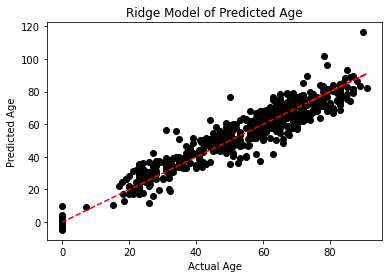

R squared:  0.8876385554472921
R value:  0.9421457187968812
Median Absolute Error:  4.599759511289228


In [23]:
plot_predictions(elastic_predict, ages)

In [24]:
def get_ridge_age_predictions(X_train, Y_train):
    loo = LeaveOneOut()
    predicted_ages = []

    for train_index, test_index in loo.split(X_train):
        X_retrain, X_retest = X_train[train_index], X_train[test_index]
        Y_retrain, Y_retest = Y_train[train_index], Y_train[test_index]
        ridge = Ridge(alpha = 0.0001)
        ridge.fit(X_retrain, Y_retrain)
        predicted_ages.append(ridge.predict(X_retest)[0])
    
    return predicted_ages

In [25]:
ridge_predict = get_ridge_age_predictions(methylation, ages)

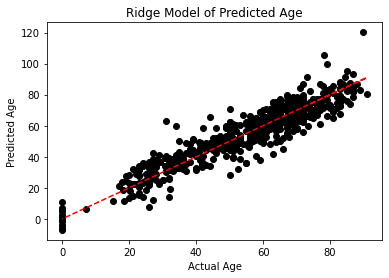

R squared:  0.8672557350253749
R value:  0.9312656629691524
Median Absolute Error:  4.861813304225755


In [26]:
plot_predictions(ridge_predict,ages)